

---


# LIBRERIAS Y MODELOS A UTILIZAR


---


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
#####################################33333333333333
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



---


#IMPORTACION DE LA DATA


---



In [2]:
from google.colab import drive
import pandas as pd

# Montar Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DIPLOMADO CIENCIA DATOS/DATHATHON/BASE DE DATOS DTATHON25/DATA LIMPIA/data.csv')
#df = pd.read_csv('/content/drive/MyDrive/DIPLOMADO CIENCIA DATOS/DATHATHON/BASE DE DATOS DTATHON25/DATA LIMPIA/Puebla.csv')
#df = pd.read_csv('/content/drive/MyDrive/DIPLOMADO CIENCIA DATOS/DATHATHON/BASE DE DATOS DTATHON25/DATA LIMPIA/Sonora2.csv')


In [4]:
df

,Unnamed: 0,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,tiempo_espera,tiempo_atencion,mismatch,mismatch_reason
0,567791,2023-01-02,banco,0.383535,0.415606,0.415699,ventanilla_a,Tienda_J,Atendido,Puebla,0.032072,0.000093,False,unico
1,567792,2023-01-02,banco,0.411289,0.415919,0.415988,ventanilla_a,Tienda_J,Atendido,Puebla,0.004630,0.000069,False,unico
2,567793,2023-01-02,retail,0.412655,0.415641,0.415919,caja_c,Tienda_J,Atendido,Puebla,0.002986,0.000278,False,unico
3,567794,2023-01-02,retail,0.415826,0.415826,0.415988,caja_f,Tienda_J,Atendido,Puebla,0.000000,0.000162,False,unico
4,567795,2023-01-02,banco,0.415919,0.416000,0.416046,ventanilla_a,Tienda_J,Atendido,Puebla,0.000081,0.000046,False,unico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16919399,17580818,2024-01-31,banco,0.799125,0.808338,0.808361,ventanilla_d,Tienda_AZ,Atendido,Sonora,0.009213,0.000023,False,unico
16919400,18211647,2024-01-31,banco,0.799287,0.799322,0.801741,ventanilla_a,Tienda_F,Atendido,Sonora,0.000035,0.002419,False,unico
16919401,17580821,2024-01-31,banco,0.800271,0.801127,0.803975,caja_b,Tienda_AZ,Atendido,Sonora,0.000856,0.002847,True,saturacion
16919402,17580822,2024-01-31,banco,0.805560,0.808477,0.808500,ventanilla_d,Tienda_AZ,Atendido,Sonora,0.002917,0.000023,False,unico


In [5]:
#ANTES DE CORRER EL CODIGO SE UTILIZO LA BASE DE DATOS COMPLETA Y SE UTILIZO UNA MUESTRA DEL TAMAÑO DE ABAJO.
df = df.sample(3000000)

In [6]:
df

,Unnamed: 0,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,tiempo_espera,tiempo_atencion,mismatch,mismatch_reason
16235893,2782411,2023-03-10,retail,0.659252,0.662944,0.664773,caja_f,Tienda_F,Atendido,Sonora,0.003692,0.001829,False,unico
14003226,7253286,2023-06-10,banco,0.503917,0.503951,0.508199,ventanilla_a,Tienda_AK,Atendido,Baja California Sur,0.000035,0.004248,False,unico
9646055,961339,2023-02-02,banco,0.467481,0.476370,0.476463,ventanilla_d,Tienda_E,Ausente,Sinaloa,0.008889,0.000093,False,unico
9222886,14304371,2023-10-08,retail,0.545722,0.554912,0.556347,caja_e,Tienda_T,Atendido,México,0.009190,0.001435,False,unico
16544832,9797545,2023-08-04,retail,0.601324,0.605387,0.608187,caja_b,Tienda_AZ,Atendido,Sonora,0.004062,0.002801,False,unico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082676,7593953,2023-06-16,retail,0.800282,0.812424,0.814669,caja_i,Tienda_AM,Atendido,Querétaro,0.012141,0.002245,False,unico
16560246,9805062,2023-08-12,retail,0.604762,0.608350,0.610109,caja_j,Tienda_AZ,Atendido,Sonora,0.003588,0.001759,False,unico
16153544,473034,2023-01-16,afiliacion,0.390861,0.424704,0.424808,p_e,Tienda_F,Ausente,Sonora,0.033843,0.000104,False,unico
12796868,13366548,2023-10-07,retail,0.457088,0.457134,0.457586,caja_f,Tienda_X,Atendido,Oaxaca,0.000046,0.000451,False,unico


In [7]:

df.drop(df[(df['hora_llegada']< 0.33335) | (df['hora_llegada']>0.85417)].index, inplace=True)
df.drop(df[df['hora_salida']>0.88195].index, inplace=True)



---


#ANALISIS y SERIE DE TIEMPO


---



In [8]:

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# FechaCompleta: si 'hora_llegada' está en [0..1], la multiplicamos por 24h
df['FechaCompleta'] = df.apply(
    lambda row: row['Fecha'] + pd.Timedelta(hours=row['hora_llegada']*24),
    axis=1
)

df.set_index('FechaCompleta', inplace=True)
df.sort_index(inplace=True)

# 2.1: SERIE HORARIA

df_hourly = df.resample('H').size().rename('n_llegadas_hora')
df_hourly = df_hourly.to_frame()  # convertir a DataFrame
data = df.copy()


# 2.2: SERIE DIARIA

df_daily = df.resample('D').size().rename('n_llegadas_dia')
df_daily = df_daily.to_frame()

print("df_hourly (primeras filas):")
print(df_hourly.head())
print("\n")
print("df_daily (primeras filas):")
print(df_daily.head())



df_hourly (primeras filas):
                     n_llegadas_hora
FechaCompleta                       
2023-01-01 12:00:00               18
2023-01-01 13:00:00               23
2023-01-01 14:00:00                8
2023-01-01 15:00:00                9
2023-01-01 16:00:00               14


df_daily (primeras filas):
               n_llegadas_dia
FechaCompleta                
2023-01-01                 78
2023-01-02               3662
2023-01-03               4593
2023-01-04               4373
2023-01-05               4090



Estadísticas de la serie horaria:
       n_llegadas_hora
count      9489.000000
mean        315.558963
std         384.677639
min           0.000000
25%           0.000000
50%          13.000000
75%         687.000000
max        1421.000000

Estadísticas de la serie diaria:
       n_llegadas_dia
count      396.000000
mean      7561.462121
std       1883.711540
min         78.000000
25%       6478.000000
50%       7511.000000
75%       8720.250000
max      12692.000000


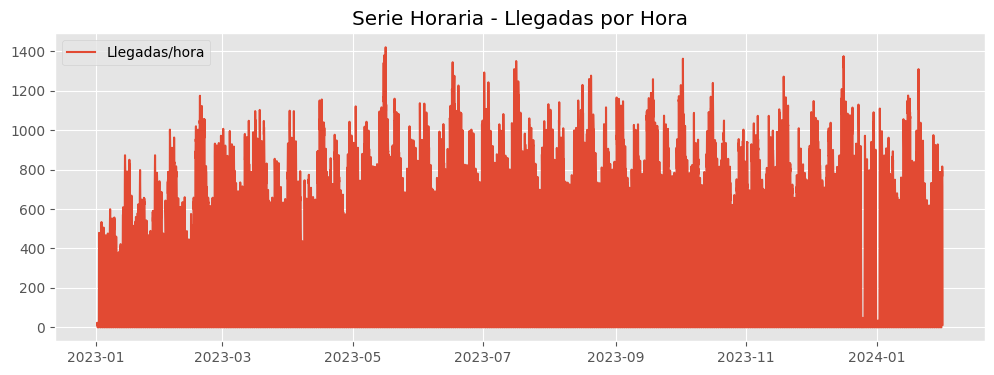

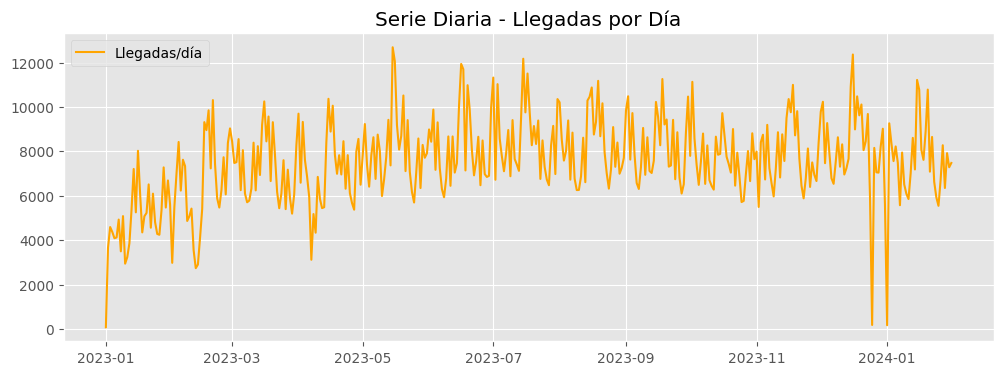

In [9]:

# Estadísticas básicas
print("\nEstadísticas de la serie horaria:")
print(df_hourly.describe())

print("\nEstadísticas de la serie diaria:")
print(df_daily.describe())

# Visualizaciones
plt.figure(figsize=(12,4))
plt.title("Serie Horaria - Llegadas por Hora")
plt.plot(df_hourly.index, df_hourly['n_llegadas_hora'], label='Llegadas/hora')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.title("Serie Diaria - Llegadas por Día")
plt.plot(df_daily.index, df_daily['n_llegadas_dia'], color='orange', label='Llegadas/día')
plt.legend()
plt.show()

# Heatmap (por día de la semana vs hora)
df['dia_semana'] = df.index.day_name()  # Lunes, Martes, etc.
df['hora'] = df.index.hour

# Registros (clientes) por (dia_semana, hora)
heat_data = df.groupby(['dia_semana','hora']).size().reset_index(name='conteo')
# Convertir 'dia_semana' a un orden (lunes->0, martes->1, etc.)
dia_map = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
           'Friday':4, 'Saturday':5, 'Sunday':6}
heat_data['dia_num'] = heat_data['dia_semana'].map(dia_map)
# Pivot para heatmap
#pivot_heat = heat_data.pivot('dia_num','hora','conteo')
"""
pivot_heat = heat_data.pivot(index='dia_num', columns='hora', values='conteo')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_heat, cmap='Reds', annot=False)
plt.title("Heatmap - Conteo de Llegadas (Día de la Semana vs Hora)")
plt.xlabel("Hora del Día")
plt.ylabel("Día de la Semana (0=Lunes ... 6=Domingo)")
"""
plt.show()



Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1769
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215  
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 
Epo

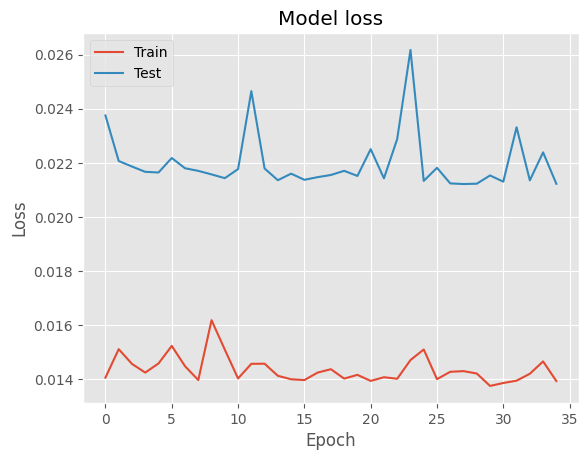

In [10]:

#Serie diaria para forecast
serie_dia = df_daily['n_llegadas_dia'].astype(float).copy()

split_index = int(len(serie_dia)*0.8)
train_data = serie_dia.iloc[:split_index]
test_data = serie_dia.iloc[split_index:]

lstm_data = serie_dia.values.reshape(-1,1)
scaler = MinMaxScaler()
lstm_data_scaled = scaler.fit_transform(lstm_data)

# Definir ventana (lag=7)
lag = 10
X, y = [], []
for i in range(lag, len(lstm_data_scaled)):
    X.append(lstm_data_scaled[i-lag:i, 0])
    y.append(lstm_data_scaled[i, 0])
X = np.array(X)
y = np.array(y)

# Dividir en train/test (igual 80/20)
split_index_lstm = int(len(X)*0.8)
X_train, X_test = X[:split_index_lstm], X[split_index_lstm:]
y_train, y_test = y[:split_index_lstm], y[split_index_lstm:]

# Reshape para LSTM [samples, timesteps, features=1]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construir modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(lag,1), activation='relu'))
model_lstm.add(Dense(1))  # salida
model_lstm.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Entrenar
model_lstm.fit(X_train, y_train, epochs=30, batch_size=20, verbose=1)

# Predecir
y_pred_lstm = model_lstm.predict(X_test)
# Invertir escalado
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Error
lstm_mae = np.mean(np.abs(y_pred_lstm_inv.flatten() - y_test_inv.flatten()))
print(f"LSTM MAE: {lstm_mae:.2f}")

history = model_lstm.fit(
    X_train, y_train,
    epochs=35,
    batch_size=10,
    validation_data=(X_test, y_test),
    verbose=0
)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




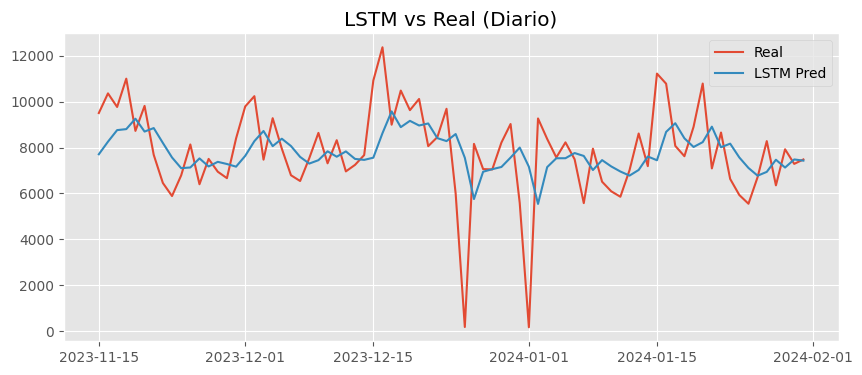

In [11]:

# Reconstruir el tiempo para X_test
test_index_lstm = serie_dia.index[lag+split_index_lstm:]
plt.figure(figsize=(10,4))
plt.plot(test_index_lstm, y_test_inv.flatten(), label='Real')
plt.plot(test_index_lstm, y_pred_lstm_inv.flatten(), label='LSTM Pred')
plt.title("LSTM vs Real (Diario)")
plt.legend()
plt.show()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1066 - val_loss: 0.0305
Epoch 2/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0176 - val_loss: 0.0277
Epoch 3/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0181 - val_loss: 0.0272
Epoch 4/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0204 - val_loss: 0.0265
Epoch 5/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - val_loss: 0.0265
Epoch 6/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0170 - val_loss: 0.0262
Epoch 7/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - val_loss: 0.0268
Epoch 8/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - val_loss: 0.0257
Epoch 9/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - val_loss: 0.0260
Epoch 10/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - val_loss: 0.0257
Epoch 11/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171 - val_loss: 0.0253
Epoch 12/55
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170 - val_l

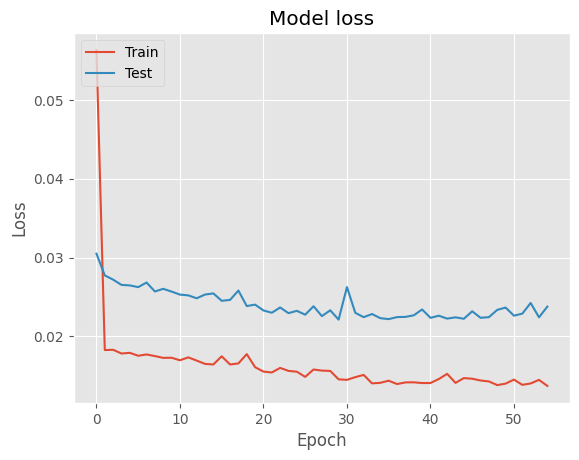

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
LSTM MAE: 1424.31


In [12]:
look_back = 20

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(look_back, 1)),  # Capa LSTM con salida en cada paso de tiempo
    LSTM(32),  # Segunda capa LSTM para extraer más información
    Dense(16, activation='relu'),  # Capa densa intermedia
    Dense(1)  # Capa de salida (sin activación para regresión)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()
history = model.fit(
    X_train, y_train,
    epochs=55,
    batch_size=10,
    validation_data=(X_test, y_test),
    verbose=1
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluacion del modelo
lstm_mae = np.mean(np.abs(y_pred_inv.flatten() - y_test_inv.flatten()))
print(f"LSTM MAE: {lstm_mae:.2f}")

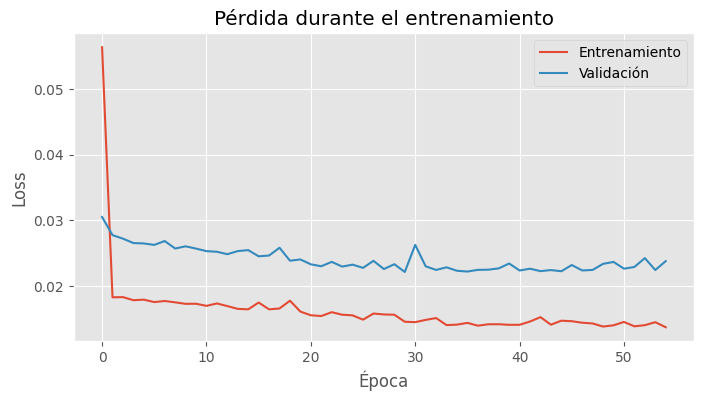

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


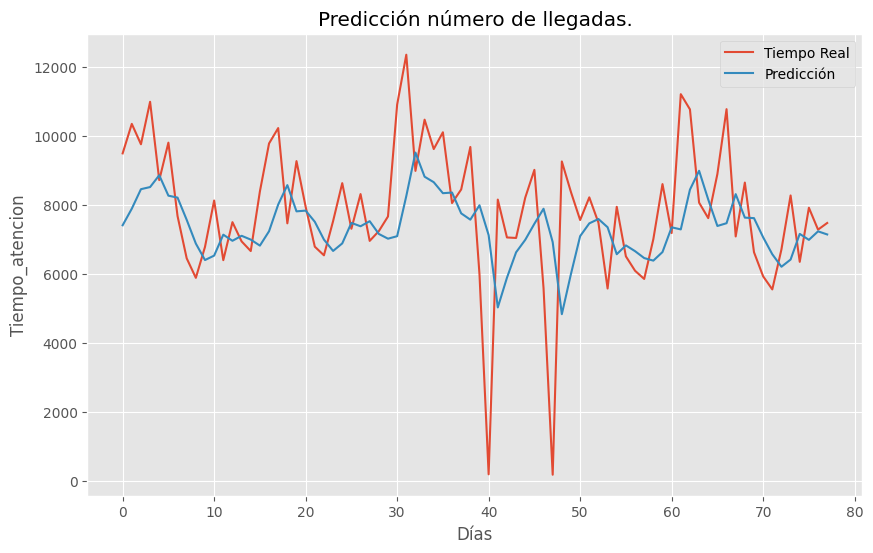

In [13]:
#Gráfica de la pérdida
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicción
y_pred = model.predict(X_test)

# Desescalamos los datos para obtener los precios reales
y_test_descaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_descaled = scaler.inverse_transform(y_pred)

# Gráfica comparativa
plt.figure(figsize=(10,6))
plt.plot(y_test_descaled, label='Tiempo Real')
plt.plot(y_pred_descaled, label='Predicción')
plt.title('Predicción número de llegadas.')
plt.xlabel('Días')
plt.ylabel('Tiempo_atencion')
plt.legend()
plt.show()